In [1]:
import random
import sys
import json
import ast

sys.path.append('..')
import calc_metrics

C:\Users\fschr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load Predictions and gold

In [2]:
fn_pred = "../../experiments/subtask2/optimized/scibert/prediction.txt"
fn_gold = "../../data/subtask2/subtask2_test.labels.txt"

preds = calc_metrics.load_bio(fn_pred)
gold = calc_metrics.load_bio(fn_gold)
print(len(preds), len(gold))


375 375


## Show Example

In [3]:
idx = random.choice(list(range(len(gold))))
print(f"test sentence: {idx}")
print(list(zip(gold[idx], preds[idx])))

test sentence: 147
[('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('B-Developer', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'B-Developer'), ('O', 'I-Developer'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'B-Version'), ('O', 'O'), ('O', 'B-Developer'), ('O', 'I-Developer'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O')

## every sentence need to have the same length!

In [4]:
for idx, (g, pred) in enumerate(zip(gold, preds)):
    if len(g) != len(pred):
        print(idx, len(g), len(pred))

## Are there different labels in gold and prediction?

In [5]:
label_test = {anno for sentence in gold for anno in sentence}
label_pred = {anno for sentence in preds for anno in sentence}
print(len(label_test), len(label_pred))
label_test - label_pred

17 16


{'I-Extension'}

## Calculate Metrics

In [6]:
metrics_df = calc_metrics.compute(preds, gold)
metrics_df

,precision,recall,f1,number
Abbreviation,0.727273,0.800000,0.761905,10.0
AlternativeName,0.400000,1.000000,0.571429,2.0
Citation,0.833333,0.909091,0.869565,66.0
Developer,0.809091,0.847619,0.827907,105.0
Extension,0.857143,0.600000,0.705882,10.0
License,0.769231,0.909091,0.833333,11.0
Release,0.466667,1.000000,0.636364,7.0
URL,1.000000,0.923077,0.960000,65.0
Version,0.935714,0.963235,0.949275,136.0
micro,0.861432,0.905340,0.882840,NaN


In [7]:
metrics_df = metrics_df.iloc[:-3]

<Figure size 1400x800 with 0 Axes>

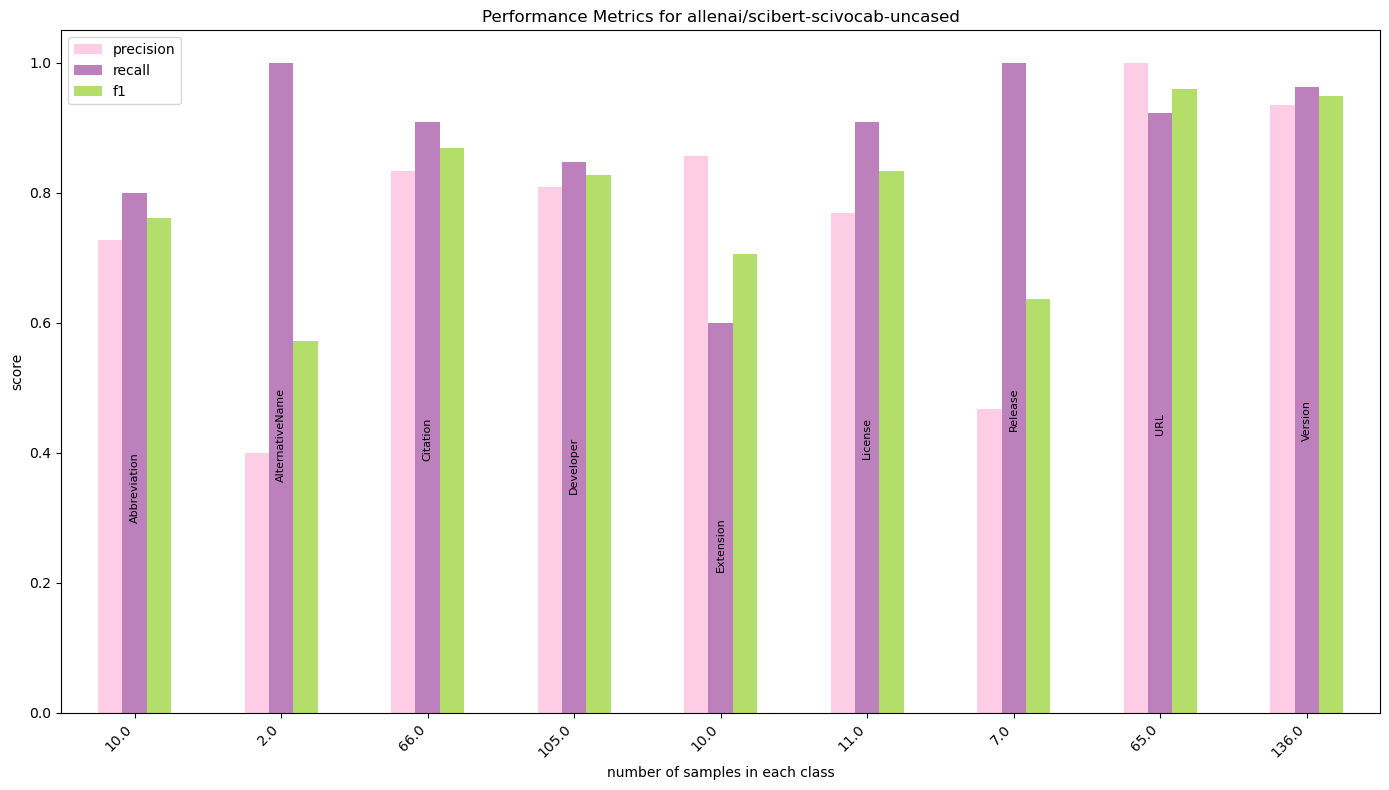

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('Set3')
colors_list = [colors[7], colors[9], colors[6]]
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plotting the precision, recall, and f1-score
ax = metrics_df.plot(kind='bar', x='number', y=['precision', 'recall', 'f1'], color=colors_list, figsize=(14, 8))

# Adding title and labels
plt.title('Performance Metrics for allenai/scibert-scivocab-uncased')
plt.xlabel('number of samples in each class')
plt.ylabel('score')

for i in range(len(metrics_df)):
    p = ax.containers[1][i]  # Select the middle bar in each group
    class_name = metrics_df.index[i]  # Get the class name for the current group
    ax.text(x=p.get_x() + p.get_width() / 2, 
            y=p.get_height()/2 ,  # Position slightly above the bar#+ 0.02
            s=class_name, 
            ha='center', va='top', rotation=90, fontsize=8, color='black')
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
result = metrics_df.loc["macro_weighted"].drop('number').to_dict()

In [8]:
result

{'precision': 0.8592520667637842,
 'recall': 0.9053398058252429,
 'f1': 0.8777309199255193}

In [9]:
with open( "../../experiments/subtask2/optimized/bert_base_uncased/training_arguments.txt") as f:
    training_arguments = f.read()

In [10]:
training_arguments.split('\n')[0]

"{'num_train_epochs': 8, 'learning_rate': 4.049121342923264e-05, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 4, 'weight_decay': 0.0006606303078059762, 'eval_strategy': 'epoch', 'logging_dir': './logs', 'logging_steps': 100, 'warmup_ratio': 0.1, 'gradient_accumulation_steps': 2, 'max_grad_norm': 1.0, 'disable_tqdm': False, 'model_name': 'bert-base-uncaced'}"

In [11]:
# training_args = json.loads(training_arguments)

In [12]:
training_arguments = ast.literal_eval(training_arguments.split('\n')[0])
epoch = training_arguments['num_train_epochs']
learning_rate = training_arguments['learning_rate']
train_batch_size = training_arguments['per_device_train_batch_size'] * training_arguments['gradient_accumulation_steps']
val_batch_size = training_arguments['per_device_eval_batch_size']
weight_decay = training_arguments['weight_decay']
model_name = training_arguments['model_name']

In [13]:
result['name'] = model_name
# result['precision'] = output['precision']
# result['recall'] = output['recall']
# result['f1'] = output['f1']
result['epochs'] = epoch
result['train_batch_size'] = train_batch_size
result['val_batch_size'] = val_batch_size
result['lr'] = learning_rate
result['weight_decay']= weight_decay
result['warmup_ratio']= 0.1
# result['precision'] = output['precision']
# result['recall'] = output['recall']
# result['f1'] = output['f1']

In [14]:
result

{'precision': 0.8592520667637842,
 'recall': 0.9053398058252429,
 'f1': 0.8777309199255193,
 'name': 'bert-base-uncaced',
 'epochs': 8,
 'train_batch_size': 8,
 'val_batch_size': 4,
 'lr': 4.049121342923264e-05,
 'weight_decay': 0.0006606303078059762,
 'warmup_ratio': 0.1}

### Write the result in a text file

In [15]:
with open("subtask2_optimized_results.txt", "a") as myfile:
    myfile.write(json.dumps(result) + "\n")

In [16]:
# with open("../../experiments/subtask2/optimized/subtask2_optimized_results.txt", "a") as myfile:
#     myfile.write("\n" + json.dumps(result) + "\n")